# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [12]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
# Для исследования возьмем степенное экспоненциальное распределение 
b = 2.7 #параметр формы
exponpow_rv = sts.exponpow(b)
sample = exponpow_rv.rvs(100)
sample

array([0.72429801, 0.63473082, 0.41074011, 0.74660412, 0.38362493,
       1.00790659, 0.83915539, 0.66315127, 0.97045893, 1.21007409,
       0.80438483, 0.97131369, 1.13038712, 0.63889573, 0.78179128,
       0.48192025, 0.24246286, 1.11338532, 0.93367761, 0.87009773,
       0.50558862, 0.74555367, 0.82651961, 0.97711819, 0.6174502 ,
       0.41477099, 0.90817959, 1.15567926, 0.5579533 , 0.93483715,
       0.99147108, 1.06190439, 1.0355331 , 0.87532732, 0.97467225,
       1.07320563, 0.40547805, 1.01907969, 0.57071406, 0.81801116,
       0.94683027, 0.73997579, 0.34227495, 0.67777227, 1.06761707,
       0.70152249, 0.68485678, 0.60173157, 0.7572323 , 0.99973972,
       1.2276835 , 0.89968509, 0.85975785, 1.1523366 , 0.23305758,
       1.02293164, 0.86447627, 0.78370759, 0.4909695 , 0.95806257,
       0.8212506 , 0.92718115, 0.86533031, 1.15511773, 1.07940279,
       1.01420231, 0.72598248, 0.49011342, 0.67867963, 0.56676216,
       0.96594117, 0.97459432, 1.01739071, 0.21578505, 0.71026

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = exponpow_rv.mean() # настоящее среднее случайной величины
real_mean

0.7663958507049852

In [5]:
real_var = exponpow_rv.var() # настоящая дисперсия случайной величины
real_var

0.058925978351475616

### Постройте гистограмму выборки и теоретическую плотность распределения

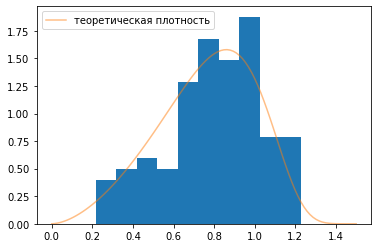

In [16]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0,1.5,100)
pdf = exponpow_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [17]:
sample_mean = sample.mean() # выборочное среднее
sample_mean

0.8026729228121655

In [18]:
sample_var = sample.var() # выборочная дисперсия
sample_var

0.0568746964452797

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

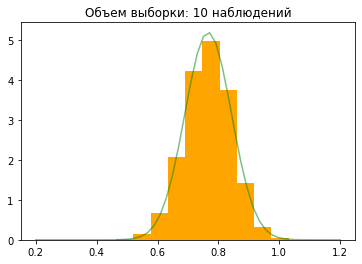

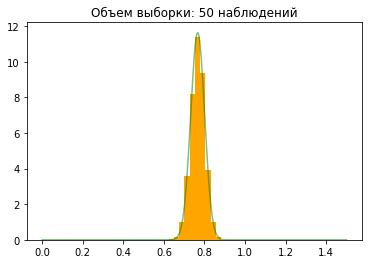

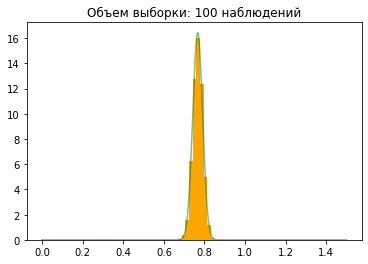

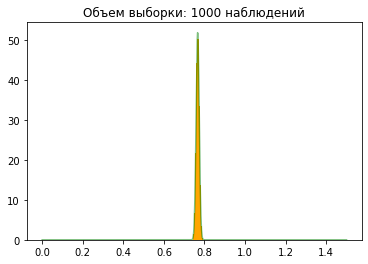

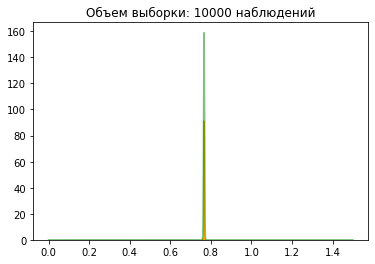

In [28]:
N_vib = [10, 50, 100, 1000, 10000]
n = 10000

for N in N_vib:
    val = []
    for _ in range(n):
        val.append(exponpow_rv.rvs(N).mean())
    plt.hist(val, density=True, color='orange')
    norm_rv = sts.norm(loc=exponpow_rv.mean(), scale = exponpow_rv.std()/np.sqrt(N))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, alpha=0.5, color="green")
    x = np.linspace(0,1.5,1000)
    plt.title(f'Объем выборки: {N} наблюдений')
    plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Для степенного экспоненциального распределения апроксимация распределения выборочного среднего работает хорошо

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [29]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [39]:
df = df[['total day calls','churn']]
df

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [40]:
df_false = df[df["churn"] == False]
df_false

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [42]:
amount_false = len(df_false)
amount_false

2850

In [43]:
df_true = df[df["churn"] == True]
df_true

,total day calls,churn
10,137,True
15,67,True
21,89,True
33,118,True
41,85,True
...,...,...
3301,113,True
3304,114,True
3320,101,True
3322,105,True


In [44]:
amount_true = len(df_true)
amount_true

483

In [46]:
#найдем среднее значение по не ушедшим клиентам(false)
mean_false = df_false['total day calls'].mean()
mean_false

100.28315789473685

In [47]:
#найдем среднее значение по ушедшим клиентам(true)
mean_true = df_true['total day calls'].mean()
mean_true

101.33540372670808

In [48]:
#найдем дисперсию по не ушедшим клиентам(false)
var_false = df_false['total day calls'].var(ddof=1)
var_false

392.08581663003537

In [49]:
#найдем дисперсию по ушедшим клиентам(true)
var_true = df_true['total day calls'].var(ddof=1)
var_true

465.79598463957115

In [50]:
#найдем стандартное отклонение по не ушедшим клиентам(false)
std_false = df_false['total day calls'].std()
std_false

19.801156951805503

In [51]:
#найдем стандартное отклонение по ушедшим клиентам(true)
std_true = df_true['total day calls'].std()
std_true

21.58230721307551

In [76]:
#Найдем оценку с использованием явной формулы для z интервала для неушедших клиентов:
print("Доверительный интервал по неушедшим клиентам для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    mean_false - 1.95996 * (std_false / np.sqrt(amount_false)), mean_false + 1.95996 * (std_false / np.sqrt(amount_false)))) 

Доверительный интервал по неушедшим клиентам для среднего по цпт, если нам известна дисперсия: [99.5561898110876, 101.01012597838609] 


In [77]:
#Найдем оценку с использованием явной формулы для z интервала для ушедших клиентов:
print("Доверительный интервал по ушедшим клиентам для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    mean_true - 1.95996 * (std_true / np.sqrt(amount_true)), mean_true + 1.95996 * (std_true / np.sqrt(amount_true)))) 

Доверительный интервал по ушедшим клиентам для среднего по цпт, если нам известна дисперсия: [99.41066620405459, 103.26014124936157] 


In [63]:
from statsmodels.stats.weightstats import _zconfint_generic

In [78]:
# с помощью метода _zconfint_generic для неушедших клиентов:
print("Доверительный интервал по неушедшим клиентам для среднего по цпт методом _zconfint_generic: {} ".format(
    _zconfint_generic(mean_false,  std_false, alpha=0.95, alternative='two-sided')))

Доверительный интервал по неушедшим клиентам для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


In [79]:
# с помощью метода _zconfint_generic для ушедших клиентов:
print("Доверительный интервал по ушедшим клиентам для среднего по цпт методом _zconfint_generic: {} ".format(
    _zconfint_generic(mean_true,  std_true, alpha=0.95, alternative='two-sided')))

Доверительный интервал по ушедшим клиентам для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


Доверительные интервалы по среднедневному количеству звонков почти не отличаются между собой по расчетам с использованием явной формулы для z интервала и метода _zconfint_generic